In [1]:
library( "DESeq2" )

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which

In [2]:
df = read.csv('mirna.loc.bam.counts.csv')
head(df)

X,SRR6182239,SRR6182240,SRR6182241,SRR6182242,SRR6182243,SRR6182244,SRR6182245,SRR6182246,SRR6182247,⋯,SRR6182271,SRR6182272,SRR6182273,SRR6182274,SRR6182275,SRR6182276,SRR6182277,SRR6182278,SRR6182279,SRR6182280
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
hsa-let-7a-1-hairpin,905,14,1270,124,2023,299,396,674,151,⋯,29,4,10,4,105,122,193,27,198,60
hsa-let-7a-2-hairpin,1112,8,1879,144,2747,354,511,831,177,⋯,37,7,18,6,112,145,214,43,239,59
hsa-let-7a-3-hairpin,921,13,1333,114,2036,294,352,650,147,⋯,33,6,15,5,91,127,217,23,190,50
hsa-let-7a-3p-mature,10,1,0,0,70,4,13,110,4,⋯,0,0,0,0,3,3,7,0,3,1
hsa-let-7a-5p-mature,2917,34,4474,382,6721,943,1239,2031,467,⋯,99,16,43,15,305,389,614,92,615,168
hsa-let-7b-3p-mature,13,0,1,1,31,3,4,17,2,⋯,3,2,0,0,2,6,4,0,2,0


In [3]:
metadata = read.csv('metadata.csv')
print(metadata)

           id           disease    sex age      cardiopathy     diabetic
1  SRR6182271            normal   male  32 non-cardiopathic non-diabetic
2  SRR6182277            normal female  37 non-cardiopathic non-diabetic
3  SRR6182274            normal   male  47 non-cardiopathic non-diabetic
4  SRR6182275            normal   male  39 non-cardiopathic non-diabetic
5  SRR6182272            normal   male  40 non-cardiopathic non-diabetic
6  SRR6182269            normal female  44 non-cardiopathic non-diabetic
7  SRR6182264            normal female  24 non-cardiopathic non-diabetic
8  SRR6182265            normal female  33 non-cardiopathic non-diabetic
9  SRR6182270            normal   male  30 non-cardiopathic non-diabetic
10 SRR6182279            normal   male  16 non-cardiopathic non-diabetic
11 SRR6182280            normal female  31 non-cardiopathic non-diabetic
12 SRR6182267            normal female  53 non-cardiopathic non-diabetic
13 SRR6182268            normal female  38 non-card

In [4]:
dds <- DESeqDataSetFromMatrix(
    colData = metadata,
    countData = df,
    design = ~ disease,
    tidy = TRUE )
dds

class: DESeqDataSet 
dim: 1869 42 
metadata(1): version
assays(1): counts
rownames(1869): hsa-let-7a-1-hairpin hsa-let-7a-2-hairpin ...
  unaligned-hairpin unaligned-mature
rowData names(0):
colnames(42): SRR6182239 SRR6182240 ... SRR6182279 SRR6182280
colData names(7): id disease ... diabetic neuropathy

In [5]:
dds <- DESeq(dds)
dds

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 26 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


class: DESeqDataSet 
dim: 1869 42 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(1869): hsa-let-7a-1-hairpin hsa-let-7a-2-hairpin ...
  unaligned-hairpin unaligned-mature
rowData names(23): baseMean baseVar ... maxCooks replace
colnames(42): SRR6182239 SRR6182240 ... SRR6182279 SRR6182280
colData names(9): id disease ... sizeFactor replaceable

In [6]:
res <- results(dds)
res

log2 fold change (MLE): disease normal vs Friedreich ataxia 
Wald test p-value: disease normal vs Friedreich ataxia 
DataFrame with 1869 rows and 6 columns
                              baseMean     log2FoldChange             lfcSE
                             <numeric>          <numeric>         <numeric>
hsa-let-7a-1-hairpin  220.296337604037  0.226216529410002  0.35276020813788
hsa-let-7a-2-hairpin  270.093741250399  0.243939056308381 0.356852128421601
hsa-let-7a-3-hairpin  221.043647048485  0.211460493615327 0.339599257088515
hsa-let-7a-3p-mature  3.65635705647773   1.22300533419819 0.504901711499573
hsa-let-7a-5p-mature  705.030123423741  0.224229296143922 0.349454620751816
...                                ...                ...               ...
hsa-mir-99b-3p-mature 3.27056069517924  0.596625968727551 0.479607887882914
hsa-mir-99b-5p-mature 130.831141407393  0.554545894821517 0.198678304448785
hsa-mir-99b-hairpin   133.995409080883  0.554491609271976 0.197884417940675
unaligne

In [7]:
summary(res)


out of 1864 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 110, 5.9%
LFC < 0 (down)     : 91, 4.9%
outliers [1]       : 0, 0%
low counts [2]     : 1125, 60%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“semi-transparency is not supported on this device: reported only once per page”

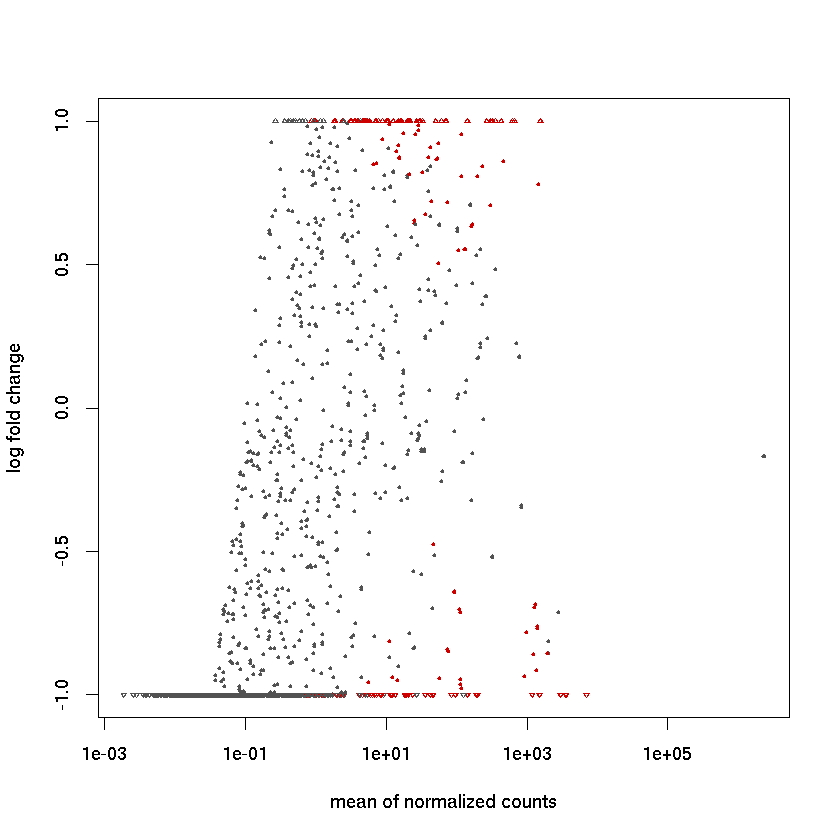

In [8]:
plotMA( res, ylim = c(-1, 1) )

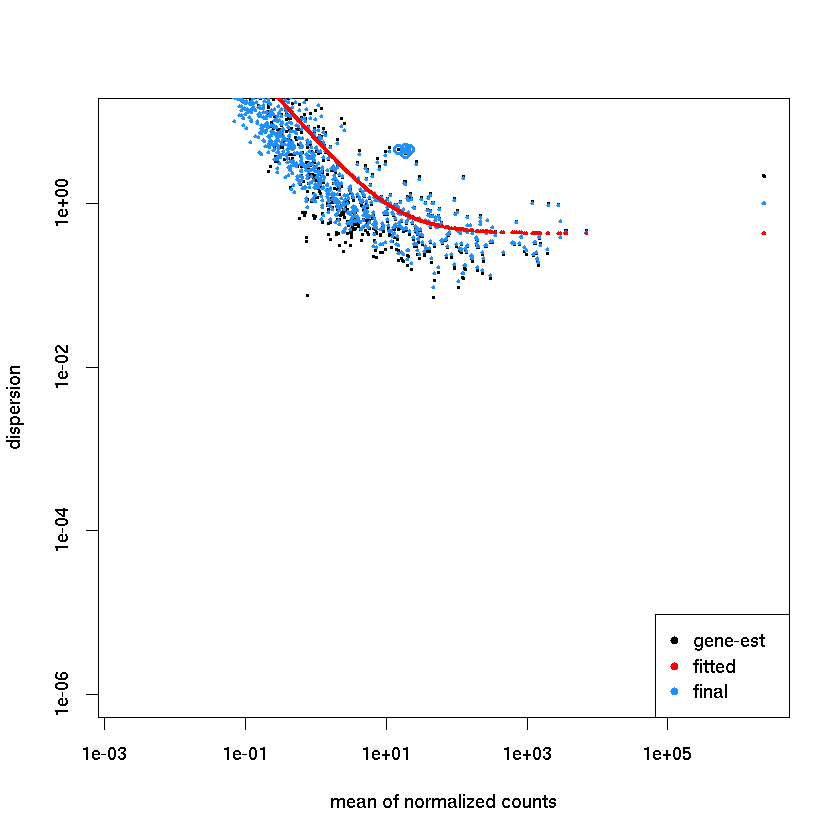

In [9]:
plotDispEsts( dds, ylim = c(1e-6, 1e1) )

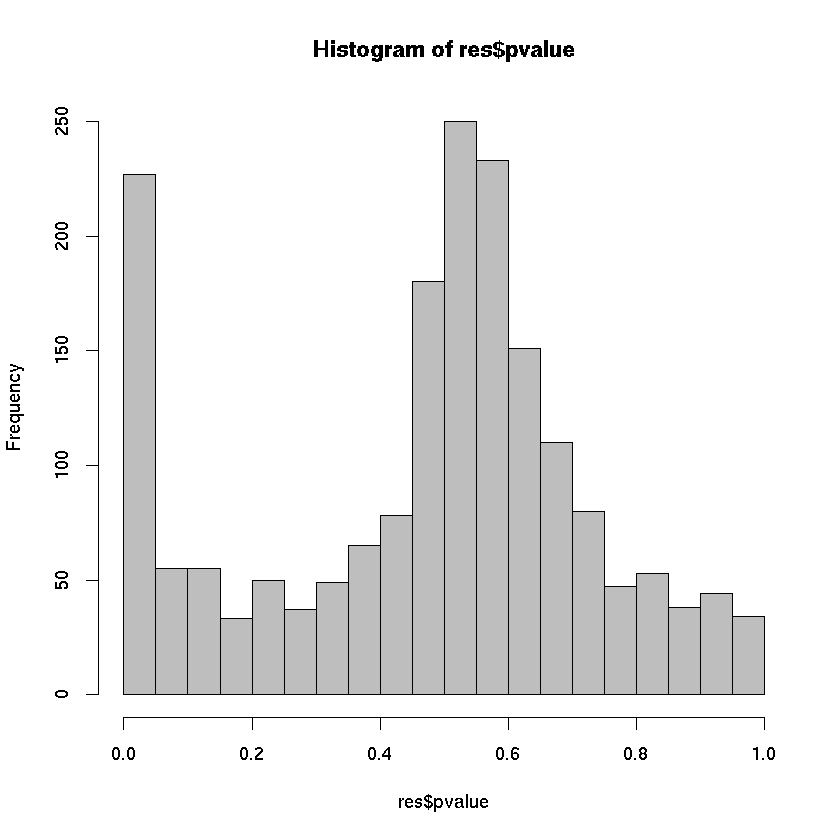

In [10]:
hist( res$pvalue, breaks=20, col="grey" )

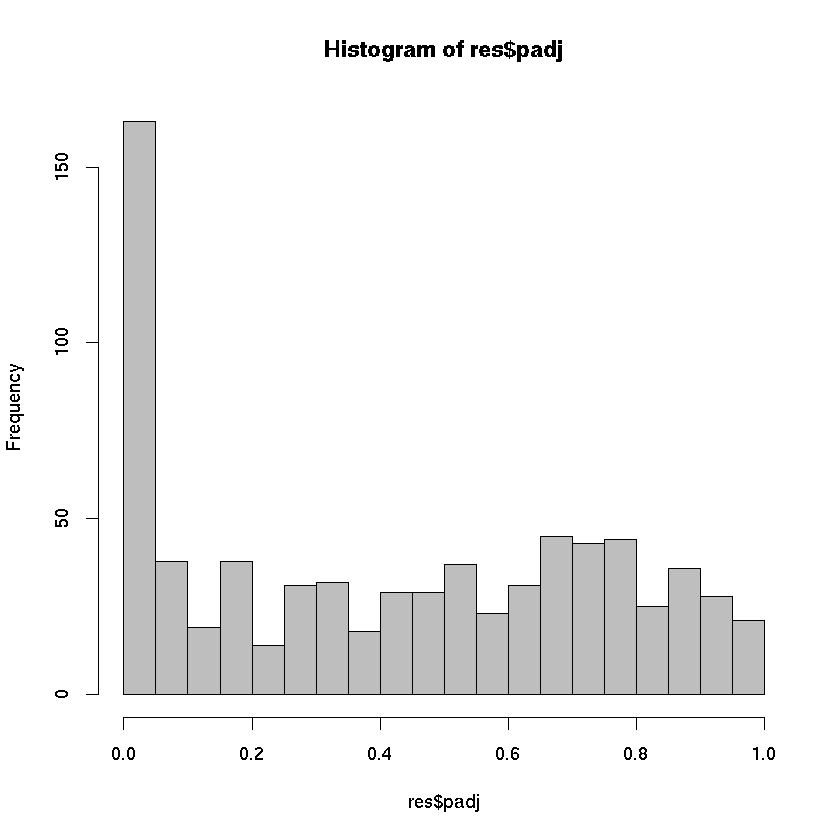

In [22]:
hist( res$padj, breaks=20, col="grey" )

In [11]:
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): disease normal vs Friedreich ataxia 
Wald test p-value: disease normal vs Friedreich ataxia 
DataFrame with 6 rows and 6 columns
                               baseMean    log2FoldChange             lfcSE
                              <numeric>         <numeric>         <numeric>
hsa-mir-486-1-hairpin  3564.12832849034 -1.72310640883548 0.301122723232693
hsa-mir-486-2-hairpin  3592.84298796152 -1.72070215792793 0.300847441951008
hsa-mir-486-5p-mature  7012.69034942723 -1.72207207450317 0.300480832578683
hsa-mir-1180-3p-mature 23.9546323852585 -1.99514405722054 0.370333456137542
hsa-mir-1180-hairpin   23.9616492223032 -1.99205064220392 0.370557900220529
hsa-mir-26a-5p-mature   622.84819816844  1.40416013103619 0.262907061161251
                                    stat               pvalue
                               <numeric>            <numeric>
hsa-mir-486-1-hairpin  -5.72227293356387 1.05108272349412e-08
hsa-mir-486-2-hairpin  -5.71951733000989 1.0682707905

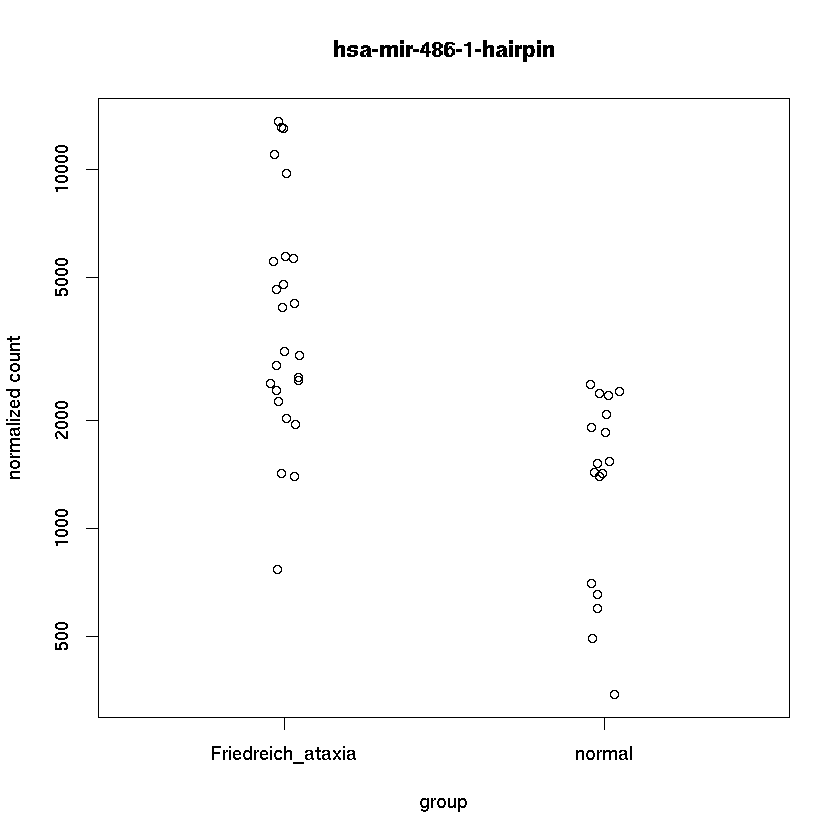

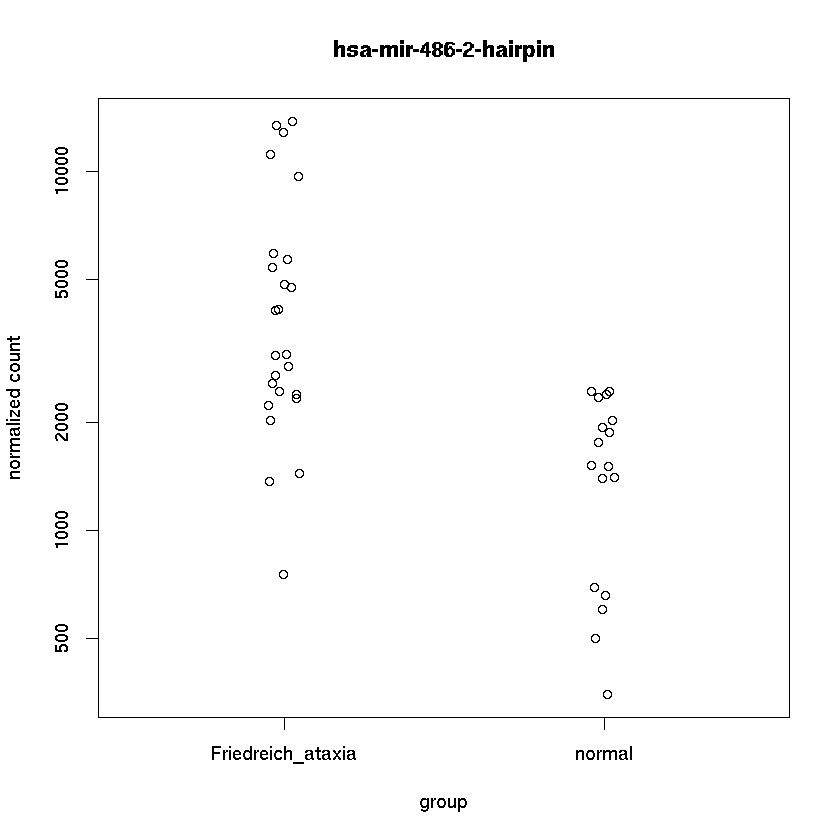

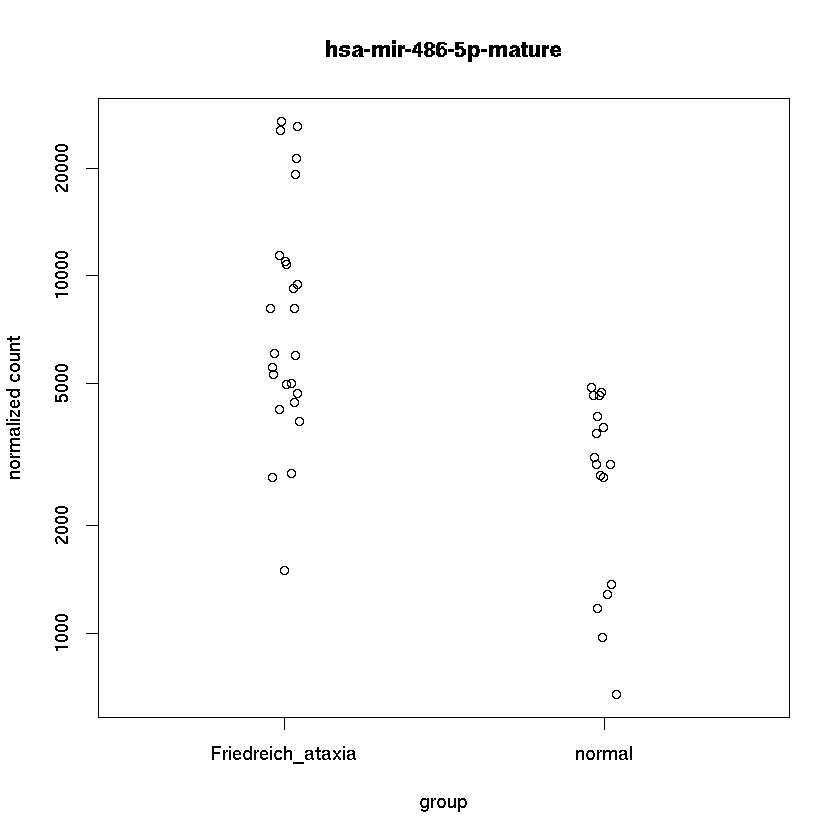

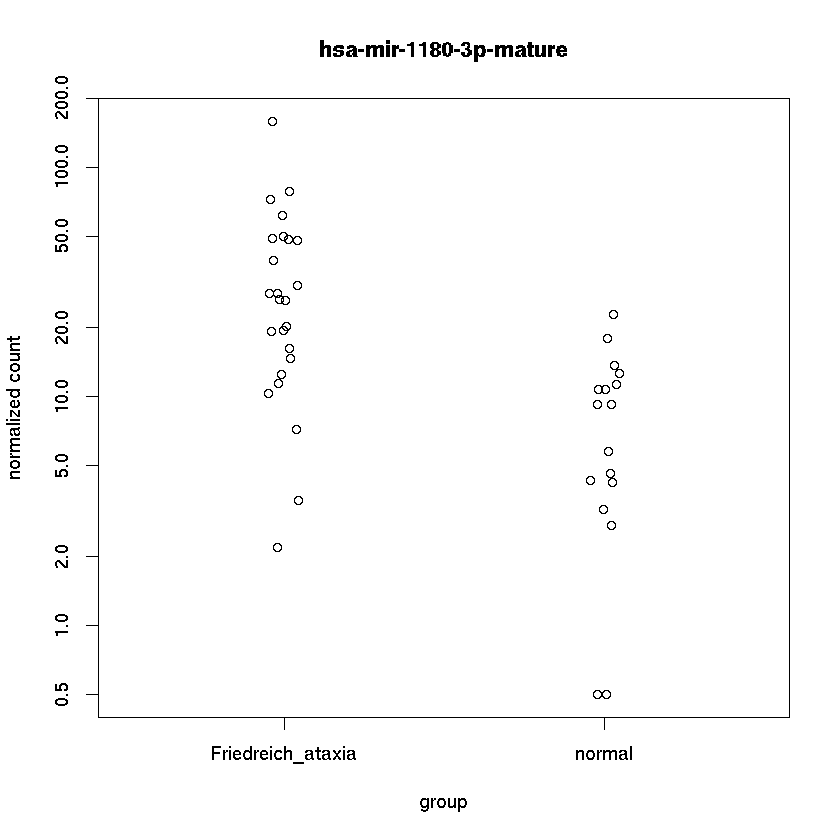

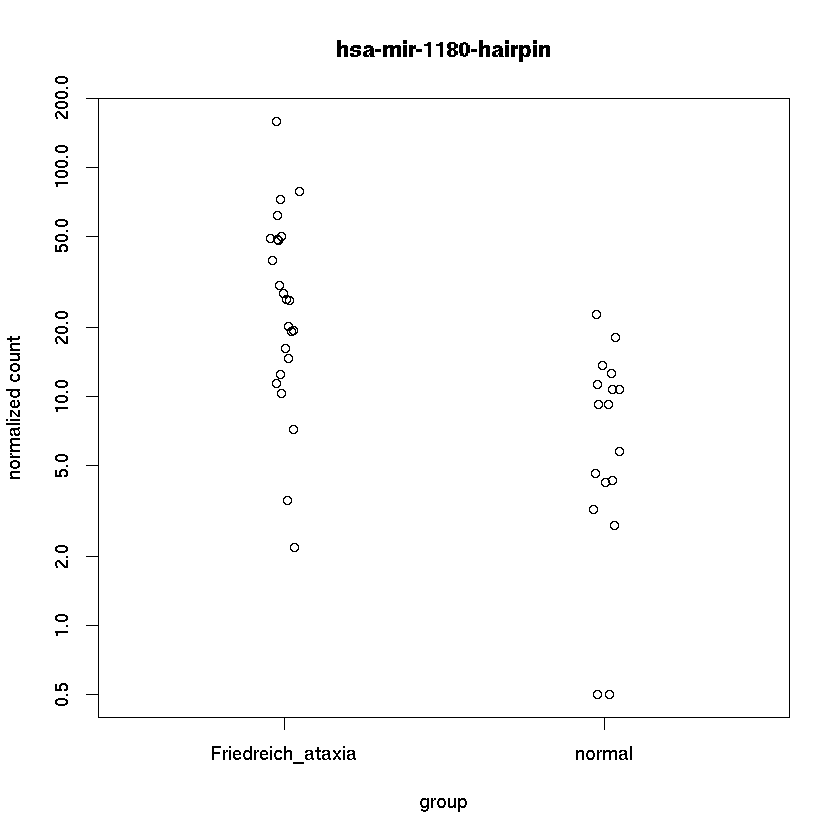

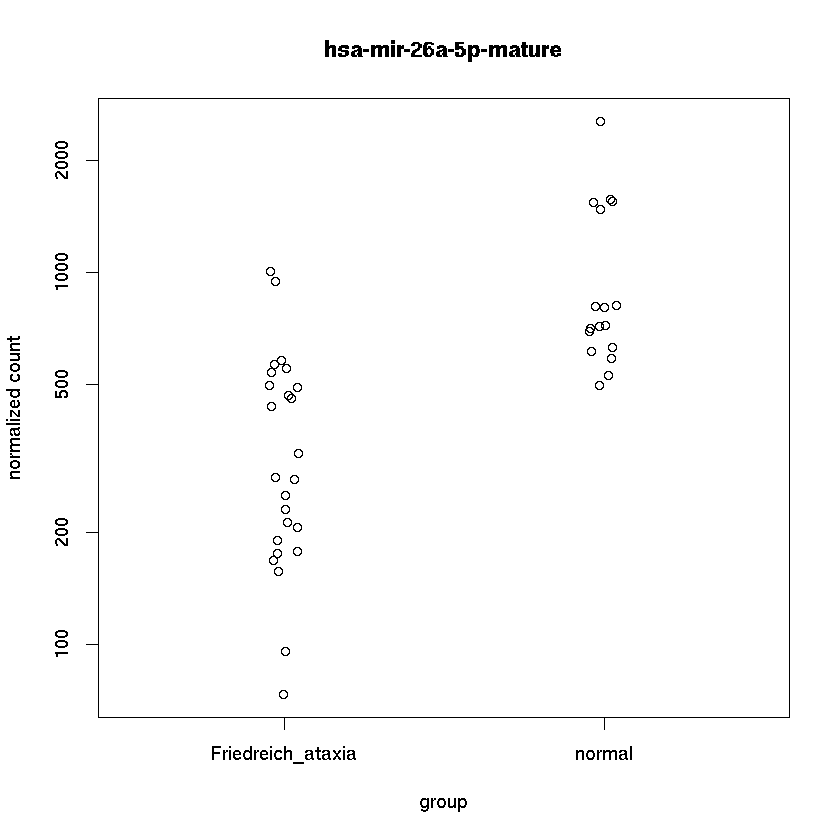

In [12]:
for( id in rownames(res[1:6,])){
    plotCounts(dds, gene=id, intgroup=c( 'disease' ) )
}

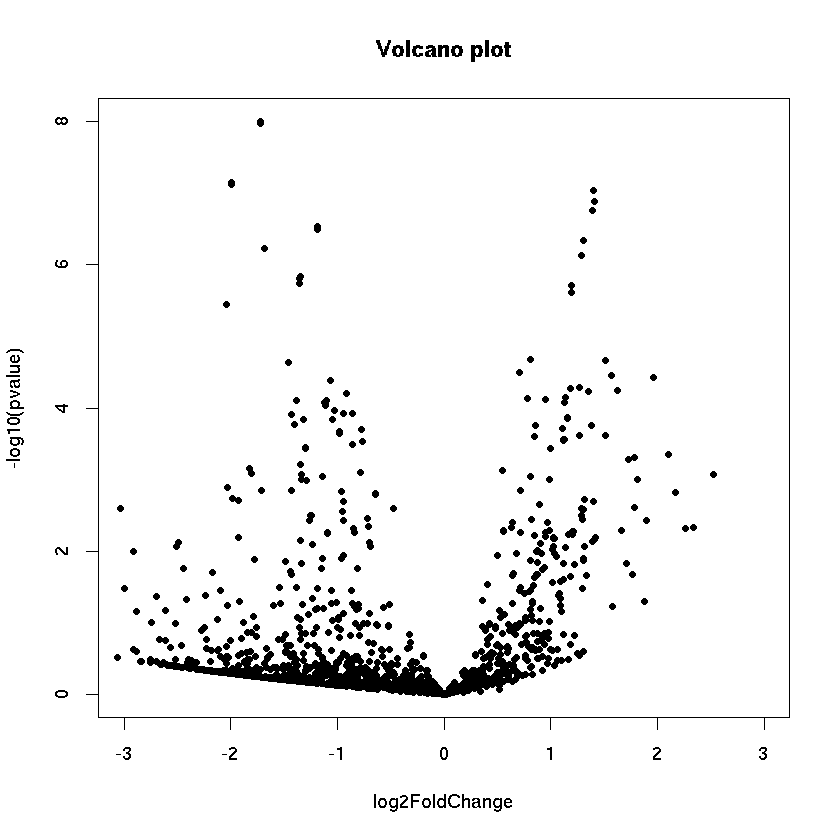

In [13]:
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

In [14]:
#with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))

In [15]:
#with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [16]:
#vsdata <- vst(dds, blind=FALSE)

In [17]:
#plotPCA(vsdata, intgroup="radiated")

In [18]:
## Apply regularized-log transform to counts
rld <- rlogTransformation(dds)

rlog() may take a few minutes with 30 or more samples,
vst() is a much faster transformation


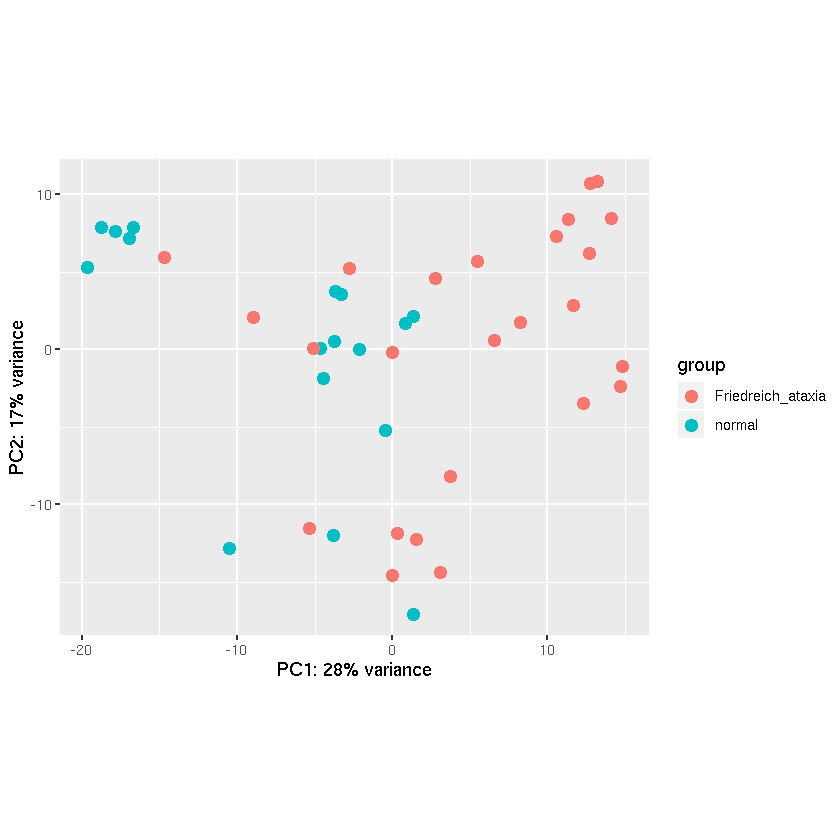

In [19]:
## Principal component analysis
plotPCA(rld, intgroup="disease")


Attaching package: ‘gplots’

The following object is masked from ‘package:IRanges’:

    space

The following object is masked from ‘package:S4Vectors’:

    space

The following object is masked from ‘package:stats’:

    lowess



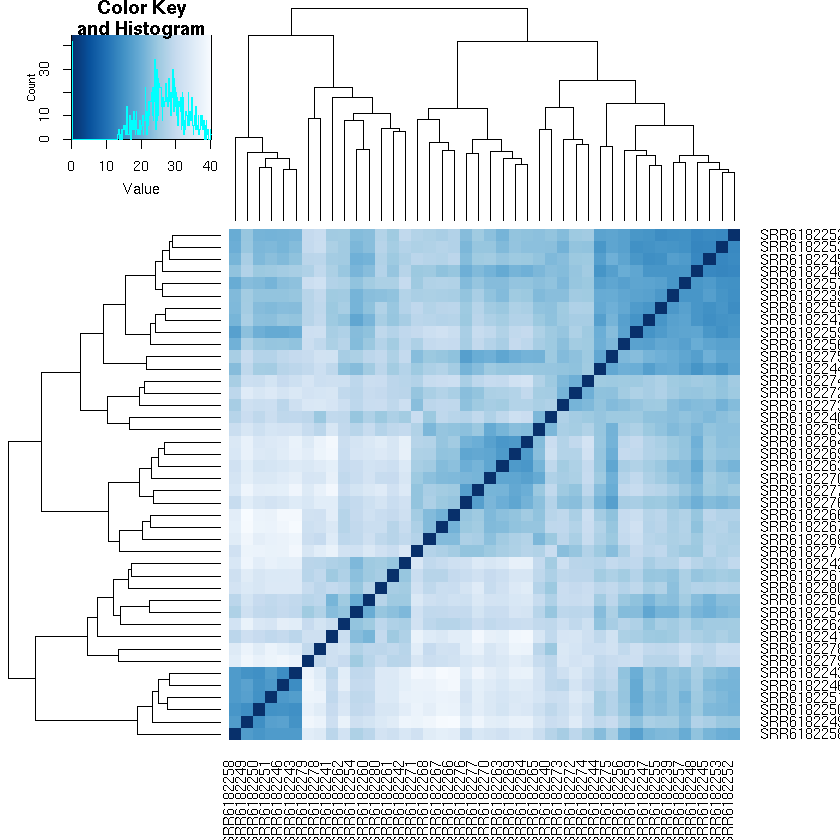

In [20]:
## Heatmap of sample distances
library("gplots")   # If this fails, run: install.packages("gplots")
library("RColorBrewer")
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix( sampleDists )
colours <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)
heatmap.2(sampleDistMatrix, trace="none", col=colours)


Attaching package: ‘genefilter’

The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars



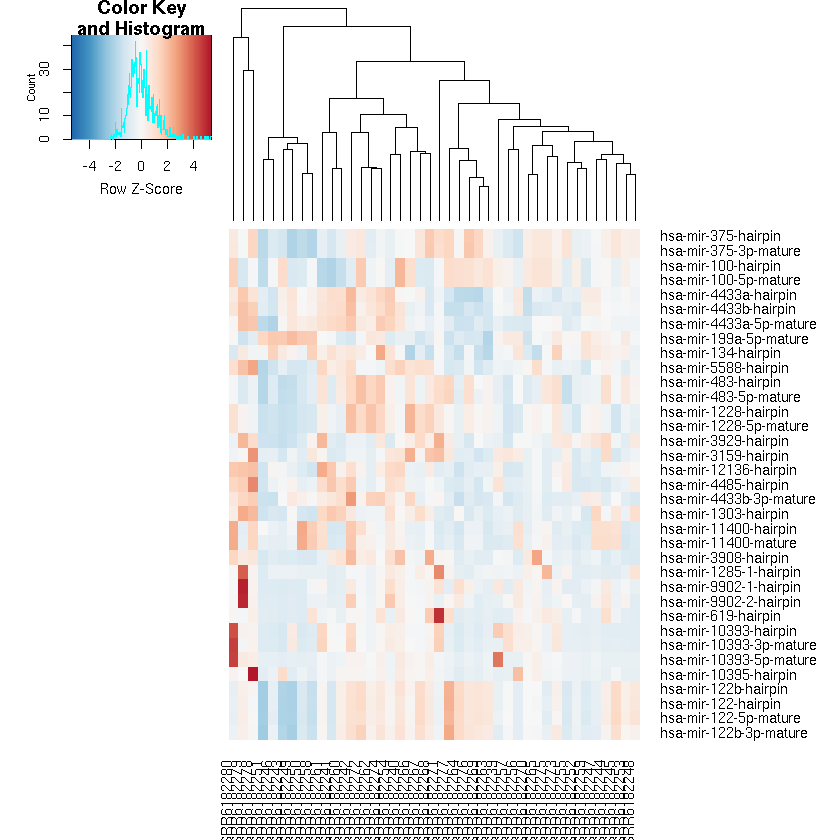

In [21]:
## Heatmap of 35 most variable genes
library("genefilter")
topVarGenes <- head(order(rowVars(assay(rld)), decreasing=TRUE), 35)
heatmap.2(assay(rld)[topVarGenes, ], scale="row",
trace="none", dendrogram="column", margins=c(5, 10),
col=colorRampPalette(rev(brewer.pal(9, "RdBu")))(255))